You should have finished watching a video on support vector machines.  This algorithm offers very high accuracy compared to other classifiers. It is used in diverse applications such as face detection, intrusion detection, classification of emails,  and handwriting recognition.  This classifier works by separating data points using a hyperplane with the largest amount of margin.

Let's take a look at using SVM to analyze if we can use specific data measurements to improve the diagnosis of breast cancer.  We have a dataset that includes tumors, malignant (cancerous) or benign (non-cancerous), and features obtained from several cell images.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  The dataset is hosted [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) but I have put it also in our Github repository.

Briefly:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Additionally, the mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  

In [1]:
import pandas as pd
dataset = pd.read_csv('../data/cancer.csv')
dataset.head()

ID diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  conc_mean  conc_points_mean  ...  \
0          0.11840           0.27760     0.3001           0.14710  ...   
1          0.08474           0.07864     0.0869           0.07017  ...   
2          0.10960           0.15990     0.1974           0.12790  ...   
3          0.14250           0.28390     0.2414           0.10520  ...   
4          0.10030           0.13280     0.1980           0.10430  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  conc_worst  conc_points_worst  symmetry_worst  \
0             0.6656      0.7119             0.2654          0.4601   
1             0.1866      0.2416             0.1860          0.2750   
2             0.4245      0.4504             0.2430          0.3613   
3             0.8663      0.6869             0.2575          0.6638   
4             0.2050      0.4000             0.1625          0.2364   

   fractral_worst  
0         0.11890  
1         0.08902  
2         0.08758  
3         0.17300  
4         0.07678  

[5 rows x 32 columns]

In [2]:
import seaborn as sns
sns.pairplot(dataset, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean'])

To prepare the dataset for SVM algorithms, I'd suggest doing three things:

1.  Check for NA values.  Previously, I've pretty much ignored this step but for your own datasets you may want to do so to decide how to deal with them.

2.  Decide what data goes into your X and y variables.  

3.  Ensure that the label categories are numeric.

4.  Create training and test datasets.


In [3]:
dataset.isnull().sum()
dataset.isna().sum()

ID                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
conc_mean            0
conc_points_mean     0
symmetry_mean        0
fractral_mean        0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
conc_se              0
conc_points_se       0
symmetry_se          0
fractral_se          0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
conc_worst           0
conc_points_worst    0
symmetry_worst       0
fractral_worst       0
dtype: int64

In [4]:
X = dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
Y = dataset.iloc[:,1].values
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [6]:
# You've learned one way of doing this previously in our Naive Bayes tutorial.
# Here is another nifty way of converting labels to numerical values.

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [8]:
X_train.shape

(426, 30)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

In [10]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
Y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [13]:
cm

array([[88,  2],
       [ 3, 50]])

In [14]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)

0.965034965034965

In [15]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Discuss the success of this model for predicting malignant and benign tumors.


From the confusion matrix and the accuracy score we can see that, the svm model have a very high predicting accuracy score which is 96.5%. For 100 sample tested 96.5 sample will be correctly classified. From the classification report we can see that the precision for 0 and 1 is very high and close to each other, which mean the model is well balanced and the accuracy is high. The precision and recall vaule is very close, means the model returned the most relevant results.

Conceptual Review Questions:
1.  What is is a hyperplane in SVM and how is it used?
2.  What are two tuning parameters that can be used for SVM and how do they impact the model in terms of overfitting?
3.  What are the pros and cons of SVMs?

1. The hyperplane in SVM means the maximaize margin between the two classes. The hpyerplan helps to make a deicision boundry to separate the two different classes. 
2. The first parameters is c, the c parameters tells the svm model how much tolerance for misclassification. The large value of c will choose a small margin of hyperplane. The second parameters is the kernel used for svm model, the kernel for svm model should be changed based on the size of the dataset and the ditribution of the data to avoid the overfitting problems.
3. The pros for svm: (1) Effective in high dimensional spaces, even for the cases where number of dimensions is greater than the number of samples. (2) It is also memory efficient, since it use a subset in the decision function. (3)The model could use different Kernel functions. The cons for svm: (1) Need to choose different kernel to avoid over fitting situation when the sample feature is much larger than the sample size. (2) SVM will not provide the probability estimates directly, the probability estimates is calculated based on the expensive five-fold cross validation.

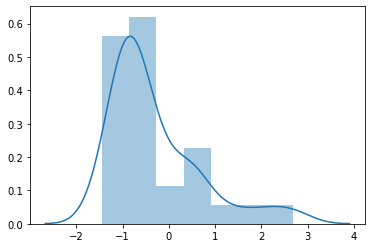

In [33]:
sns.distplot(X_train[1,:])